<a href="https://colab.research.google.com/github/IlTACK-OH/Section1_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section1 Project
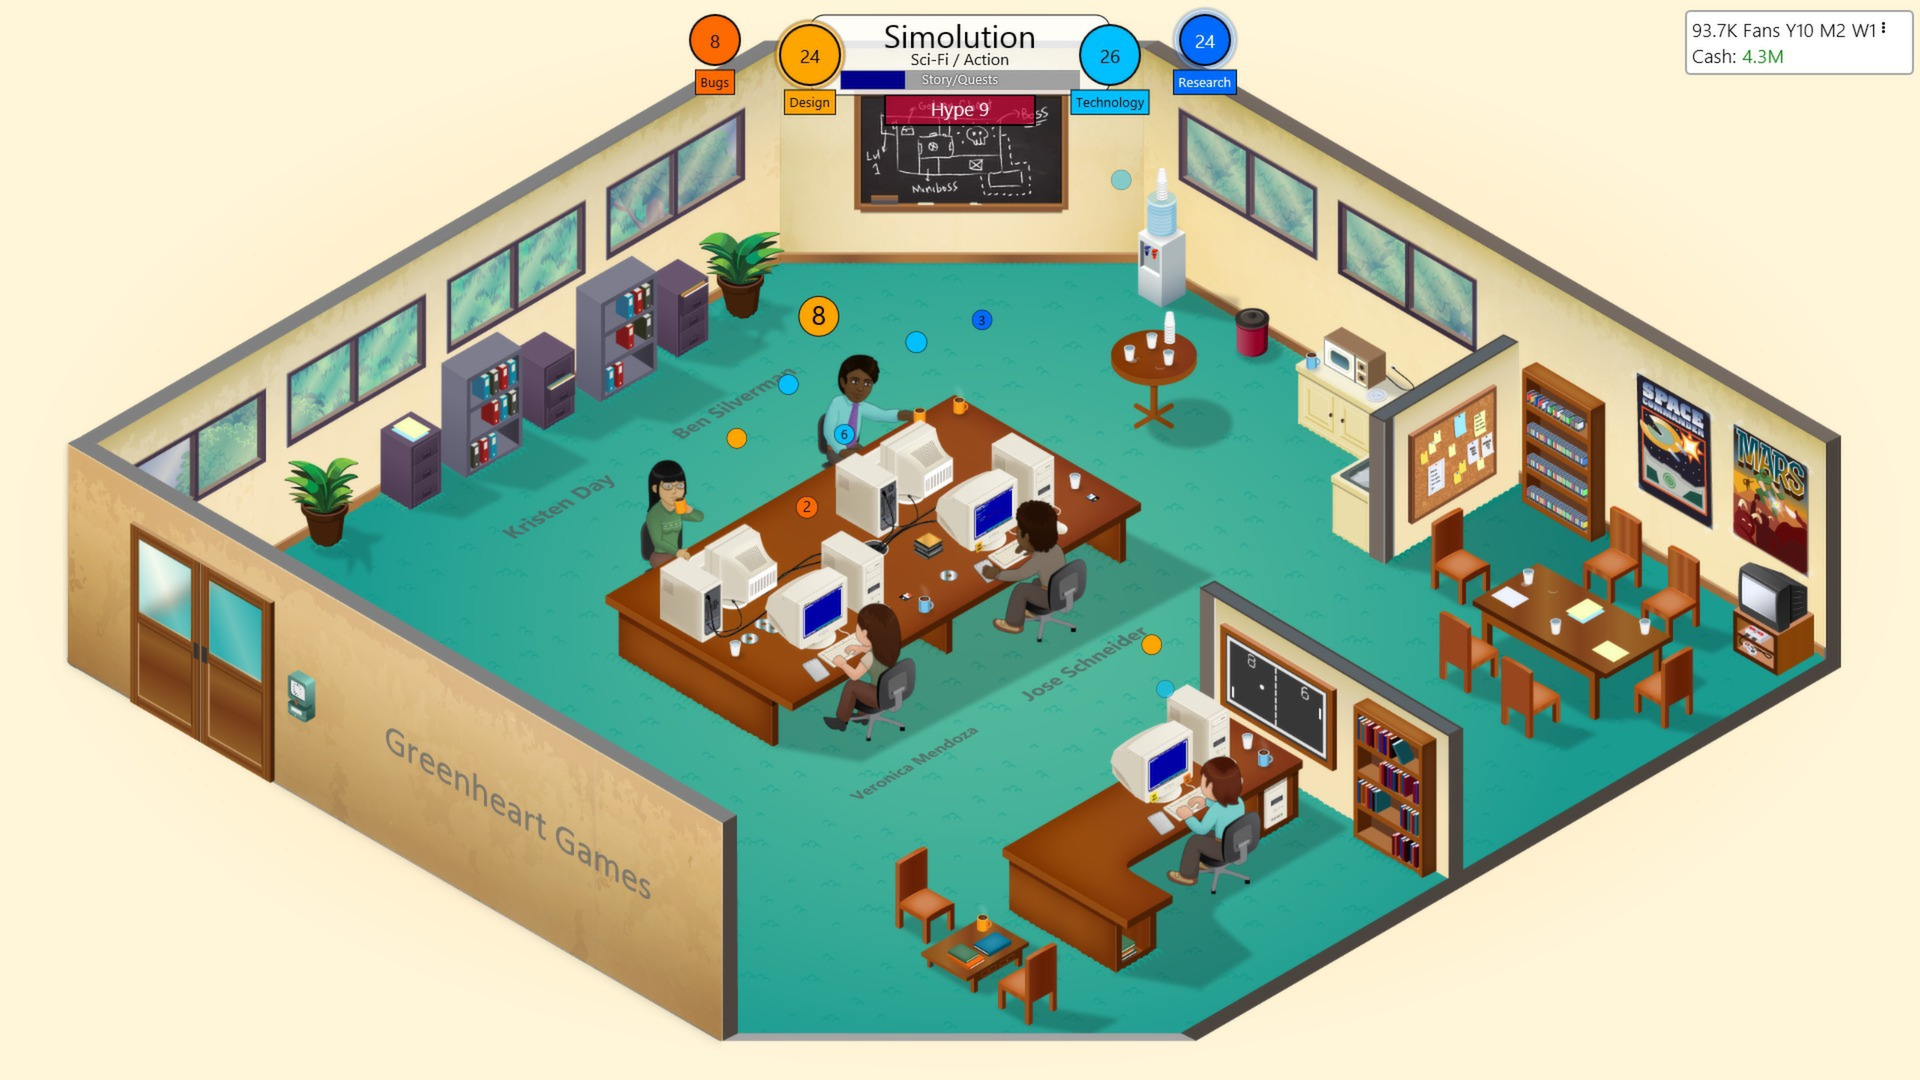
> **"다음 분기에 어떤 게임을 설계해야 할까?"**

기존의 데이터에 기반하여 인사이트를 얻고, 어떤 게임을 다음 분기에 설계하여야 하는지, 의사결정을 진행하여라.

---


> 🔔 반드시 포함되어야할 내용
1. 지역에 따라서 선호하는 게임의 장르가 다른가?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sps

In [2]:
from google.colab import files
files.upload();

## 1. Data Wrangling & EDA

In [3]:
df = pd.read_csv('vgames2.csv')

In [4]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [7]:
df.shape

(16598, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
df.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [10]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df[df[['Name','Platform','Genre','Publisher']].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02


- 중복값 제거
- Year의 경우 이상치가 존재한다. 따라서 이를 확인하고 조치해야함.
- Year의 data type은 `int`가 적절하다고 판단된다.
- 판매 국가 범주화.
- Sales양을 float 형식으로 변환
- `Total_Sales`라는 새 feature생성
---
<br>

### 1-1. 중복치 제거

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(16597, 9)

중복값이 제대로 제거됨을 확인할 수 있다.

---
<br>

### 1-2. "`Year`" 이상치 및 결측치 처리 
- 세계최초의 컴퓨터 게임은 1958년에 제작된 "Tennies of to"<br>
하지만 Year에서 최솟값이 0으로 이상치가 존재함을 알 수 있다.<br>
따라서 이를 확인해보아야 한다.

In [16]:
df[df.Year < 1958].shape

(100, 9)

100개의 이상치가 존재한다.

In [17]:
Year_flo = df[df.Year < 1958].Year

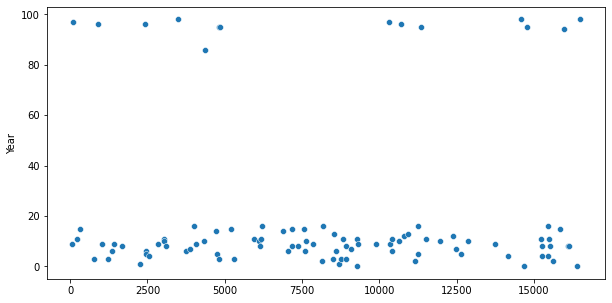

In [18]:
plt.figure(figsize=(10,5))
sactter_plt = sns.scatterplot(data=Year_flo)

위 그래프를 통하여 Year의 앞자리가 표시되지 않은 것을 미루어 짐작할 수 있다.<br>따라서 80보다 높은 년도는 1900년대라고 생각하고, 그 이후는 2000년대라고 생각한다.<br>이를 확인해보기 위하여 실제 몇몇 데이터들을 통해 해당 게임이 언제 출시되었는지 검색을 진행하여 본다.

In [19]:
df[(df.Year>80)&(df.Year<100)].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0,0,0.9,0
2429,Casper,PS,96.0,Adventure,Interplay,0.46,0.31,0,0.05
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4365,Adventure Island,NES,86.0,Platform,Hudson Soft,0,0,1.05,0


- Treasures of the Deep	: 1997년출시
- Mini-Yonku Shining Scorpion: Let's & Go!! : 1996년 출시
- Casper : 1996년 출시
- Glover : 1998년 출시
- Adventure Island : 1986년출시<br>
<br>이를 통하여 데이터 입력시에 앞의 년도를 누락하고 작성했다는 것을 파악할 수 있다. 따라서 이 부분을 채워주도록한다.

In [20]:
New_Year=[]
for i,j in enumerate(df.Year):
  if (j>80)&(j<100):
    New_Year.append(j+1900)
  elif (j<=22)&(j>=0):
    New_Year.append(j+2000)
  else:
    New_Year.append(j)

In [21]:
df_sub = df.copy()

In [22]:
df_sub.Year = New_Year

In [23]:
df_sub.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [24]:
df_sub[df_sub.Year < 1958]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


이상치들이 정상적으로 입력되었음을 확인할 수 있다.<br>

In [25]:
df_sub.Year = df_sub.Year.astype('str')

In [26]:
df_sub.Year = df_sub.Year.str.extract('(\d+)')

In [27]:
df_sub.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10094,Mega Man Battle Network: Operation Shooting Star,DS,NaN,Role-Playing,Capcom,0,0,0.07,0
745,BioShock 2,X360,2010,Shooter,Take-Two Interactive,1.45,0.55,0.02,0.19
13248,Torino 2006,PS2,2006,Sports,Take-Two Interactive,0.06,0.05,0,0.02
9787,Chicken Run,PS,2000,Adventure,Eidos Interactive,0.07,0.05,0,0.01
229,Guitar Hero: Van Halen,PS2,2009,Misc,Activision,0.05,0.04,0,0.01


In [28]:
df_sub.Year.isnull().sum()

270

In [29]:
df_sub.dropna(axis=0,subset=['Year'],inplace=True)

In [30]:
df_sub = df_sub.reset_index(drop=True)
df_sub.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16322,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16323,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16324,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16326,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [31]:
df_sub.Year = df_sub.Year.astype('int') # year의  data type은 object보다 integer가 더 적절함.

년도에 결측치가 있는 270개의 데이터를 삭제하였다.<br>
이는 전체 데이터의 약 1.6%로, 삭제를 진행하여도 데이터 분석 결과에 큰 영향을 미치지 않을 것으로 판단하여 삭제하였다.

----

In [32]:
df = df_sub.copy() #수정된 데이터를 다시 원본으로 저장.

In [33]:
df_sub = df.copy()

In [34]:
df_sub.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

---
### 1-3. Genre 결측치처리

 `Genre`는 이번 데이터 분서에서 중요한 요소이다.<br>
 그리고 50개 정도의 비교적 적은 양의 결측치를 가지므로, 이를 채워준다.

In [35]:
Gen_null_idx=df_sub[df_sub.Genre.isnull()].index # 추후 값 입력을 위한 인덱스 저장

In [36]:
df_sub.Genre.unique() # Genre 분류확인

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [37]:
Gen_null_data = np.array(['Platform','Sports','Sports','Action','Role-Playing',
                 'Racing','Action','Action','Sports','Fighting',
                 'Adventure','Sports','Action','Puzzle','Fighting',
                 'Misc','Role-Playing','Role-Playing','Adventure','Role-Playing',
                 'Strategy','Action','Sports','Action','Racing',
                 'Role-Playing','Adventure','Adventure','Simulation','Simulation',
                 'Action','Platform','Racing','Shooter','Adventure',
                 'Sports','Adventure','Strategy','Puzzle','Adventure',
                 'Action','Platform','Racing','Shooter','Action',
                 'Role-Playing','Puzzle','Racing','Action','Racing'])

In [38]:
df_sub.loc[Gen_null_idx,'Genre'] = Gen_null_data

In [39]:
df_sub.loc[Gen_null_idx].sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10270,The Mummy: Tomb of the Dragon Emperor,Wii,2008,Adventure,Vivendi Games,0.08,0,0,0.01
3871,MVP Baseball 2004,PS2,2004,Sports,Electronic Arts,1.1,0.06,0,0.18
11480,The History Channel: Battle for the Pacific,Wii,2007,Shooter,Activision,0.1,0,0,0.01
11511,Time Travelers,PSV,2012,Adventure,Level 5,0,0,0.05,0
15169,"WarioWare, Inc.: Mega Party Game$",GC,2003,Action,Nintendo,0.2,0.05,0.44,0.02
14960,James Bond 007: Nightfire,XB,2002,Shooter,Electronic Arts,0.58,220K,0,0.03
7678,Myth Makers: Orbs of Doom,Wii,2007,Racing,Popcorn Arcade,0.05,0,0,0
49,Ape Escape: On the Loose,PSP,2005,Platform,Sony Computer Entertainment,0.52,0.01,0.12,0.05
12119,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0,0.01
10339,Bakemonogatari Portable,PSP,2012,Adventure,Namco Bandai Games,0,0,0.05,0


결측치 값이 잘 입력된 것을 확인할 수 있다.

---

In [40]:
df = df_sub.copy()

In [41]:
df_sub = df.copy()

In [42]:
df_sub.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

---
### 1-4. "`Publisher`"결측치 처리

이 역시 결측치 값이 36개로 그 수가 많지 않다.<br>
하지만 이번 분석에 있어서 Publisher은 크게 중요하지 않다.<br>
따라서, 결측치는 `Unknown`으로 처리한다. 

In [43]:
df_sub.Publisher  = df_sub.Publisher.fillna('Unknown')

In [44]:
df_sub.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

결측치가 모두 Unknown으로 대체되었다.

---

In [45]:
df = df_sub.copy()

In [46]:
df_sub = df.copy()

---

### 1-6. "`Sales`"이상치 처리

데이터를 살펴보면 뒤에 문자로 끝나는 `Sales`값으로 인하여 object형식으로 저장된 것을 알 수 있다.<br>
 따라서 문자열로 끝나는 것들을 찾아서 수정하여 준다.<br>
 이떄, 기준을 찾아야한다. K가 의미하는 것이 몇장인지 지금 소수점의 자릿수는 몇장인지 찾아낼 필요가 있다.<br>이를 알아내기 위하여 "Poketmon X/PoketmonY"의 판매량을 기준으로 선정하였다.

In [47]:
df_sub[df_sub.Name=='Pokemon X/Pokemon Y']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1946,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5170K,4.05,4.34,0.79


포켓몬은 현재까지 약 1,600만장이 판매되었다.<Br>
이 데이터가 최신 데이터가 아니라는 가정하에 기본 단위는 백만장. K는 천장으로 보는 것이 타당하다.<br>
그리고 이에 따라서 M은 백만장을 의미한다.

In [48]:
def has_err_K(x):
  return bool(re.search('[K]',x))

def has_err_M(x):
  return bool(re.search('[M]',x))

In [49]:
def re_sub_K(x):
  pat = re.compile('(\d+[.]?)([K])')
  return pat.sub('\g<1>',x)

def re_sub_M(x):
  pat = re.compile('(\d+[.]?)([M])')
  return pat.sub('\g<1>',x)

In [50]:
from seaborn.axisgrid import JointGrid
col_name=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i,j in enumerate(col_name):
  data_K = df_sub[df_sub[j].apply(has_err_K)][j]
  data_M = df_sub[df_sub[j].apply(has_err_M)][j]
  
  clean_data_K = data_K.apply(re_sub_K).astype('float')
  clean_data_M = data_M.apply(re_sub_M).astype('float')

  clean_data_K = clean_data_K*0.001
  clean_data_M = clean_data_M*1.000

  K_data_index = clean_data_K.index
  M_data_index = clean_data_M.index

  df_sub.loc[K_data_index,j] = clean_data_K
  df_sub.loc[M_data_index,j] = clean_data_M

In [51]:
df_sub[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]=df_sub[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype('float')

In [52]:
df_sub.loc[M_data_index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
63,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00
72,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0.00,0.01
207,Harry Potter and the Sorcerer's Stone,XB,2003,Action,Electronic Arts,0.05,0.02,0.00,0.00
218,Dragon Quest IV: Michibikareshi Monotachi,PS,2001,Role-Playing,Enix Corporation,0.00,0.00,1.20,0.01
241,Seaman 2: Peking Genjin Ikusei Kit,PS2,2007,Simulation,Sega,0.00,0.00,0.06,0.00


In [53]:
df_sub.loc[K_data_index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
243,Petz: Saddle Club,PSP,2009,Simulation,Ubisoft,0.08,0.00,0.0,0.01
277,Warhammer: Dark Omen,PS,1998,Strategy,Electronic Arts,0.02,0.01,0.0,0.00
395,The Dog Island,PS2,2007,Adventure,Ubisoft,0.13,0.10,0.0,0.03
636,LEGO Star Wars II: The Original Trilogy,GC,2006,Action,LucasArts,0.75,0.19,0.0,0.03
865,Sports Car GT,PS,1999,Racing,Electronic Arts,0.12,0.08,0.0,0.01


In [54]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16327 non-null  object 
 4   Publisher    16327 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


`Sales`의 데이터가 `float`형식으로 올바르게 변환되었음을 알 수 있다.

---

In [55]:
df = df_sub.copy()

In [56]:
df_sub = df.copy()

In [57]:
df_sub[df_sub.iloc[:,0:5].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8584,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.0,0.01,0.0,0.0


중복치가 새롭게 발견되었다. 왜 발생되었는지 살펴보고 적절한 조치를 취하여 준다.

In [58]:
df_sub[(df_sub.Name=='Madden NFL 13')&(df_sub.Platform=='PS3')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8584,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


데이터에서 `Madden NFL 13`이 입력될 때 2번에 나뉘어서 입력되어진 것 같다.<br>두 데이터를 합하여 값을 대입하고 중복된 행을 제거하여 준다.

In [59]:
NFL_index = df_sub[(df_sub.Name=='Madden NFL 13')&(df_sub.Platform=='PS3')].index
New_Sales = df_sub.iloc[NFL_index[0],5:]+df_sub.iloc[NFL_index[1],5:]

In [60]:
df_sub.iloc[NFL_index[0],5:] = New_Sales

In [61]:
df_sub.drop(NFL_index[1],inplace=True)

In [62]:
df_sub[(df_sub.Name=='Madden NFL 13')&(df_sub.Platform=='PS3')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.24,0.0,0.22


In [63]:
df_sub[df_sub.iloc[:,0:5].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


위 코드의 실행 결과를 비교하여 보면, 중복값이 제대로 계산되어서 들어가고, 삭제된 것을 확인할 수 있다.

In [64]:
df_sub = df_sub.reset_index(drop=True)

그리고 앞에서 미쳐 제거하지 않은 `Year`가 잘못입력되어 들어간 게임에 대한 처리도 해주어야 한다.

In [65]:
Need_dup=df_sub[(df_sub.Name=='Need for Speed: Most Wanted')&((df_sub.Platform=='PC')|(df_sub.Platform=='X360'))]
index_for_drop=Need_dup.index
Need_dup

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1302,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15
2633,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05
12329,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13582,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [66]:
Need_sale = Need_dup.groupby(['Year','Platform'],as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Need_sale

,Year,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2005,PC,0.02,0.23,0.00,0.05
1,2005,X360,1.00,0.17,0.02,0.10
2,2012,PC,0.00,0.06,0.00,0.02
3,2012,X360,0.62,0.80,0.01,0.15


In [67]:
Need_new = []
for i in range(2):
  value = Need_sale.iloc[i,2:]+Need_sale.iloc[i+2,2:]
  Need_new.append(value)
Need_new

[NA_Sales       0.02
 EU_Sales       0.29
 JP_Sales        0.0
 Other_Sales    0.07
 dtype: object, NA_Sales       1.62
 EU_Sales       0.97
 JP_Sales       0.03
 Other_Sales    0.25
 dtype: object]

In [68]:
df_sub.iloc[index_for_drop[3],5:]=Need_new[0]
df_sub.iloc[index_for_drop[0],5:]=Need_new[1]

In [69]:
df_sub.drop(index_for_drop[[1,2]],inplace=True)

In [70]:
df_sub[(df_sub.Name=='Need for Speed: Most Wanted')&((df_sub.Platform=='PC')|(df_sub.Platform=='X360'))]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1302,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,1.62,0.97,0.03,0.25
13582,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.02,0.29,0.00,0.07


In [71]:
df_sub.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16319,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16320,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16321,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16322,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


---

### 1-7. Total_Sales column생성

In [72]:
df_sub['Total_Sales'] = df_sub[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_sub.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02


---

In [73]:
df = df_sub.copy()

In [74]:
df_sub=df.copy()

---

### 2-1. 필수 포함내용(1번, 2번)
> "지역에 따라서 선호하는 게임의 장르는 다른가?"

위 가설을 통계적으로 검증하기 위하여 다음과 같이 가설을 설정한다.<br> 
> $\mu_0$: 지역에 따라 선호하는 게임의 장르는 다르지 않다.<br>
$\mu_1$: 지역에 따라 선호하는 게임의 장르는 다르다.

가설 검증 방법으로는 **`카이제곱 독립성검정`**방법을 사용한다.<br>
유의 수준은 0.05로 한다.

In [75]:
Sales_df = df_sub.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,859.59,514.84,157.75,184.78
Adventure,103.05,64.25,53.10,16.86
Fighting,220.81,100.02,87.15,36.19
Misc,402.08,213.73,106.67,73.42
Platform,446.34,201.19,130.65,51.73
Puzzle,121.87,50.48,56.24,12.46
Racing,356.95,236.32,56.61,76.68
Role-Playing,327.50,188.34,350.55,59.74
Shooter,575.16,310.45,38.18,101.90


In [76]:
sps.chi2_contingency(Sales_df)[1]

2.284900221250567e-123

In [77]:
P_value =[]
for j in range(3):
  for i in range(4):
    if i+1>3:
      pass
    elif j>=i+1:
      pass
    else:
      value = sps.chi2_contingency(Sales_df.iloc[:,[j,i+1]])[1]
      P_value.append(value)
print(f'- 카이제곱 독립성검증 결과 -\n North America & EU : {P_value[0]}\n',
      f'North America & Japan : {P_value[1]}\n North America & Other : {P_value[2]}\n',
      f'EU & Japan : {P_value[3]}\n EU & Other : {P_value[4]}\n Japan & Other : {P_value[5]}')

- 카이제곱 독립성검증 결과 -
 North America & EU : 0.03244305312561451
 North America & Japan : 1.4774107182750557e-107
 North America & Other : 0.03394633012541317
 EU & Japan : 8.292438397584168e-87
 EU & Other : 0.7526896526655724
 Japan & Other : 1.02464369405615e-53


결과를 살펴보면 기본적으로는 
 `EU & Other`을 제외하고는 `P-value`가 모두 0.05보다 낮으므로 대립가설을 채택할 수 있다.<br><br>
`EU & Other`는 귀무가설을 기각할 수 없다. 즉, 두 나라 사이에 선호하는 게임의 장르는 크게 다르지 않다.

In [78]:
ideal_df = pd.DataFrame(sps.chi2_contingency(Sales_df)[3],index=Sales_df.index,columns=Sales_df.columns)

In [79]:
Sales_df['Type'] = 'real'
ideal_df['Type'] = 'ideal'
concat_df = pd.concat([Sales_df,ideal_df])

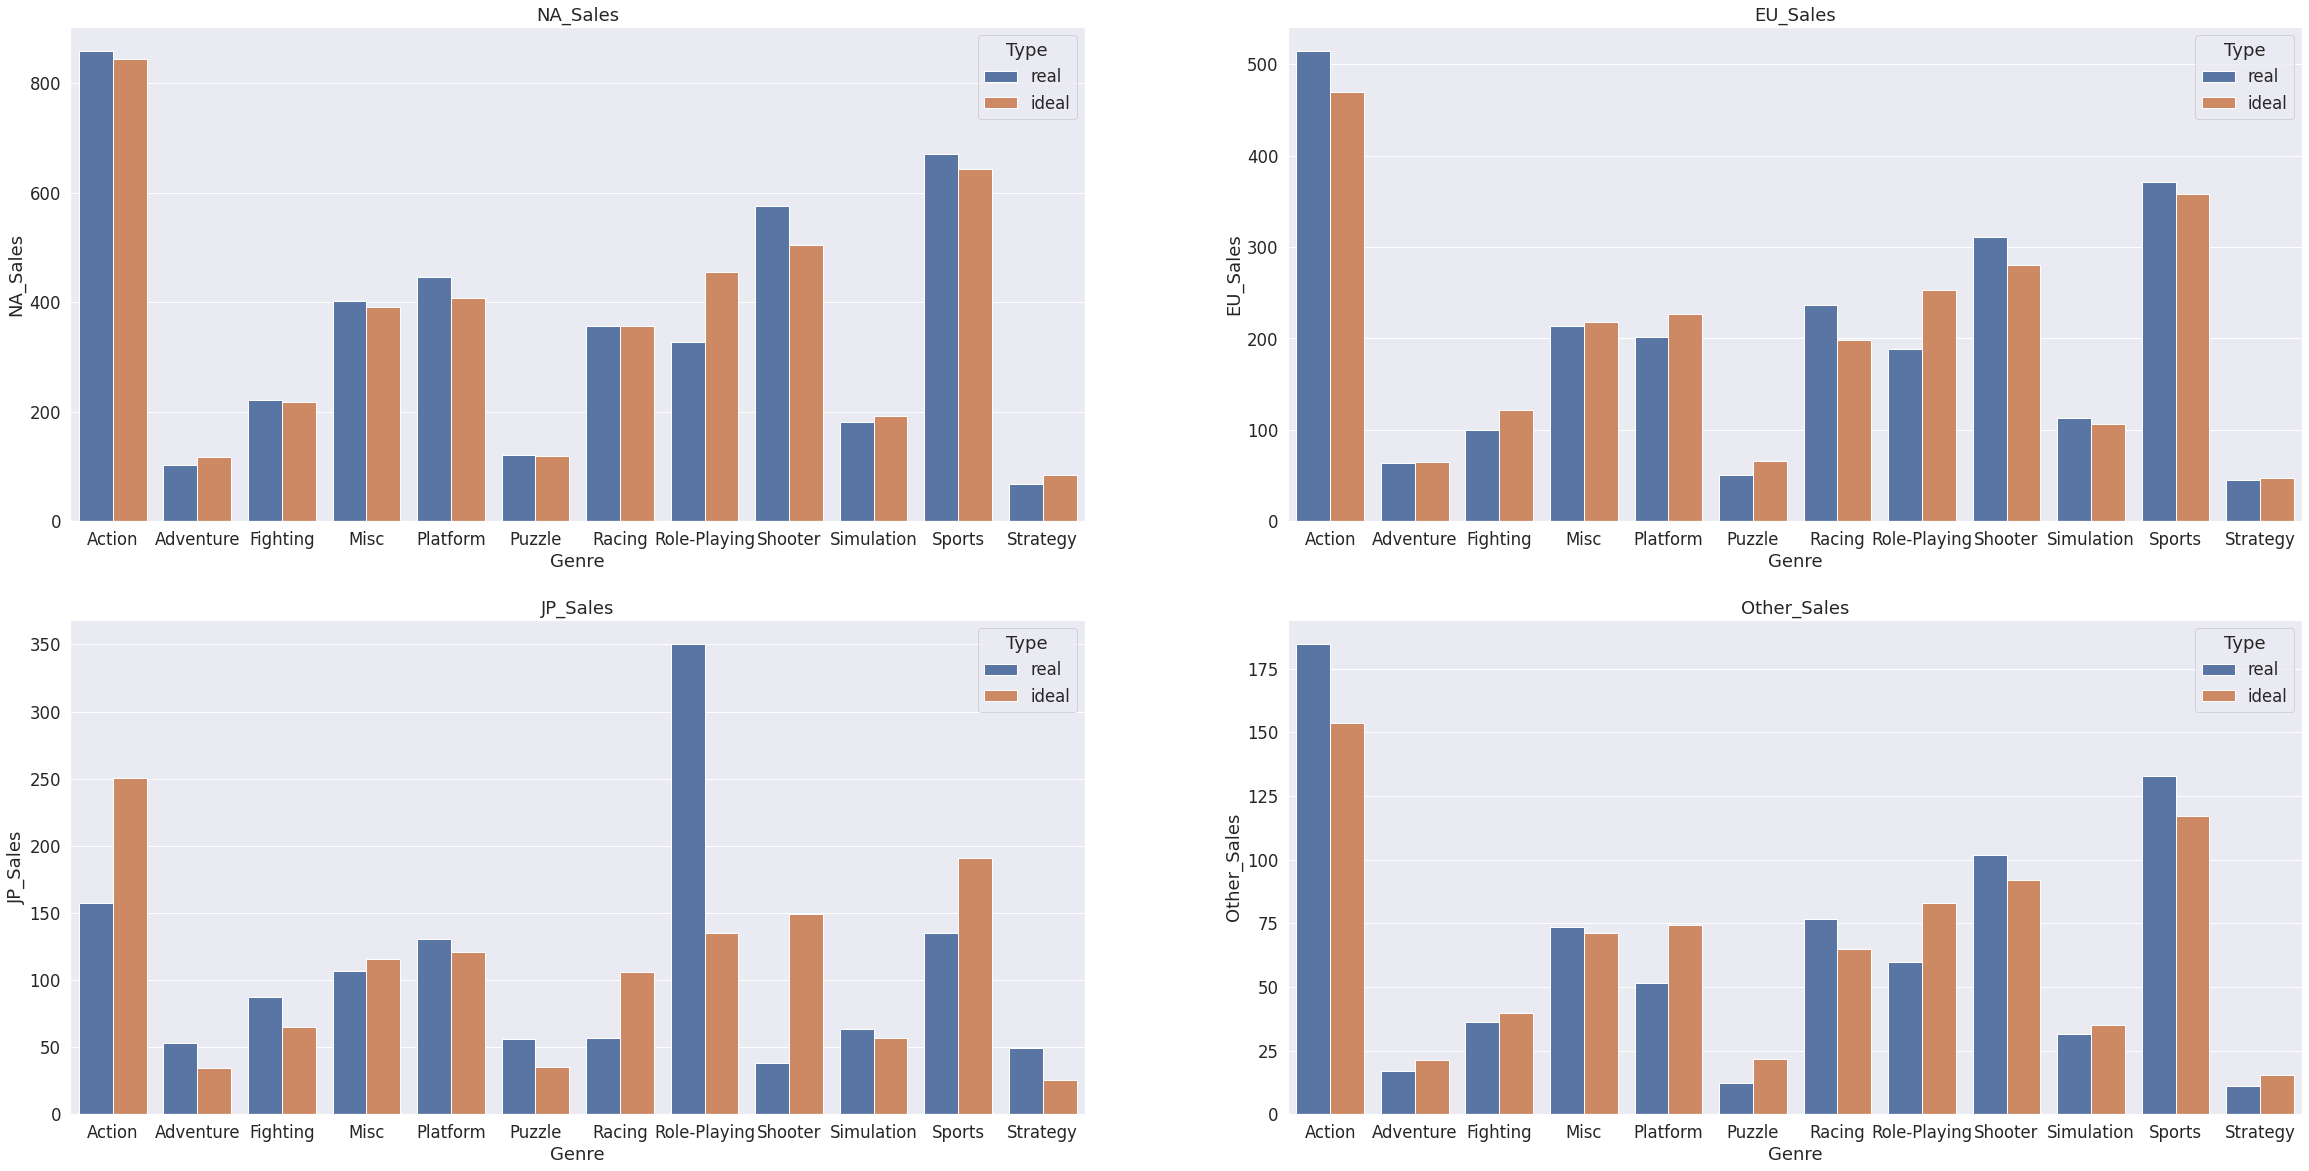

In [80]:
fig = plt.figure(figsize=([40,20]))
y_data = concat_df.columns
sns.set(font_scale=1.5)

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(data=concat_df,x=concat_df.index,y=y_data[i],hue='Type')
plt.show()

> **정리**<br>
결과적으로는 각 나라의 범주에 대해서 장르에 따른 선호도 차이가 존재한다.<br>
하지만, `EU`와 `other`의 경우 두 데이터에 대해서는 국가에 따른 선호도 차이가 존재하지 않는 것으로 나타난다.<br> 이는 EU라는 데이터 자체가, 다국가 표본이기 때문에 그런 것으로 사료된다.

---

> 연도별 게임 트렌드의 변화

In [81]:
bins = [1980,1990,2000,2010,2021]
label=['the 1980s','the 1990s','the 2000s','the 2010s~']
cat_year = pd.cut(df_sub.Year,bins,labels=label,right=False)

In [82]:
cat_df = pd.concat([cat_year,df_sub.Genre],axis=1)

In [83]:
cat_df = cat_df.groupby('Year').Genre.value_counts(normalize=True).unstack().fillna(0)

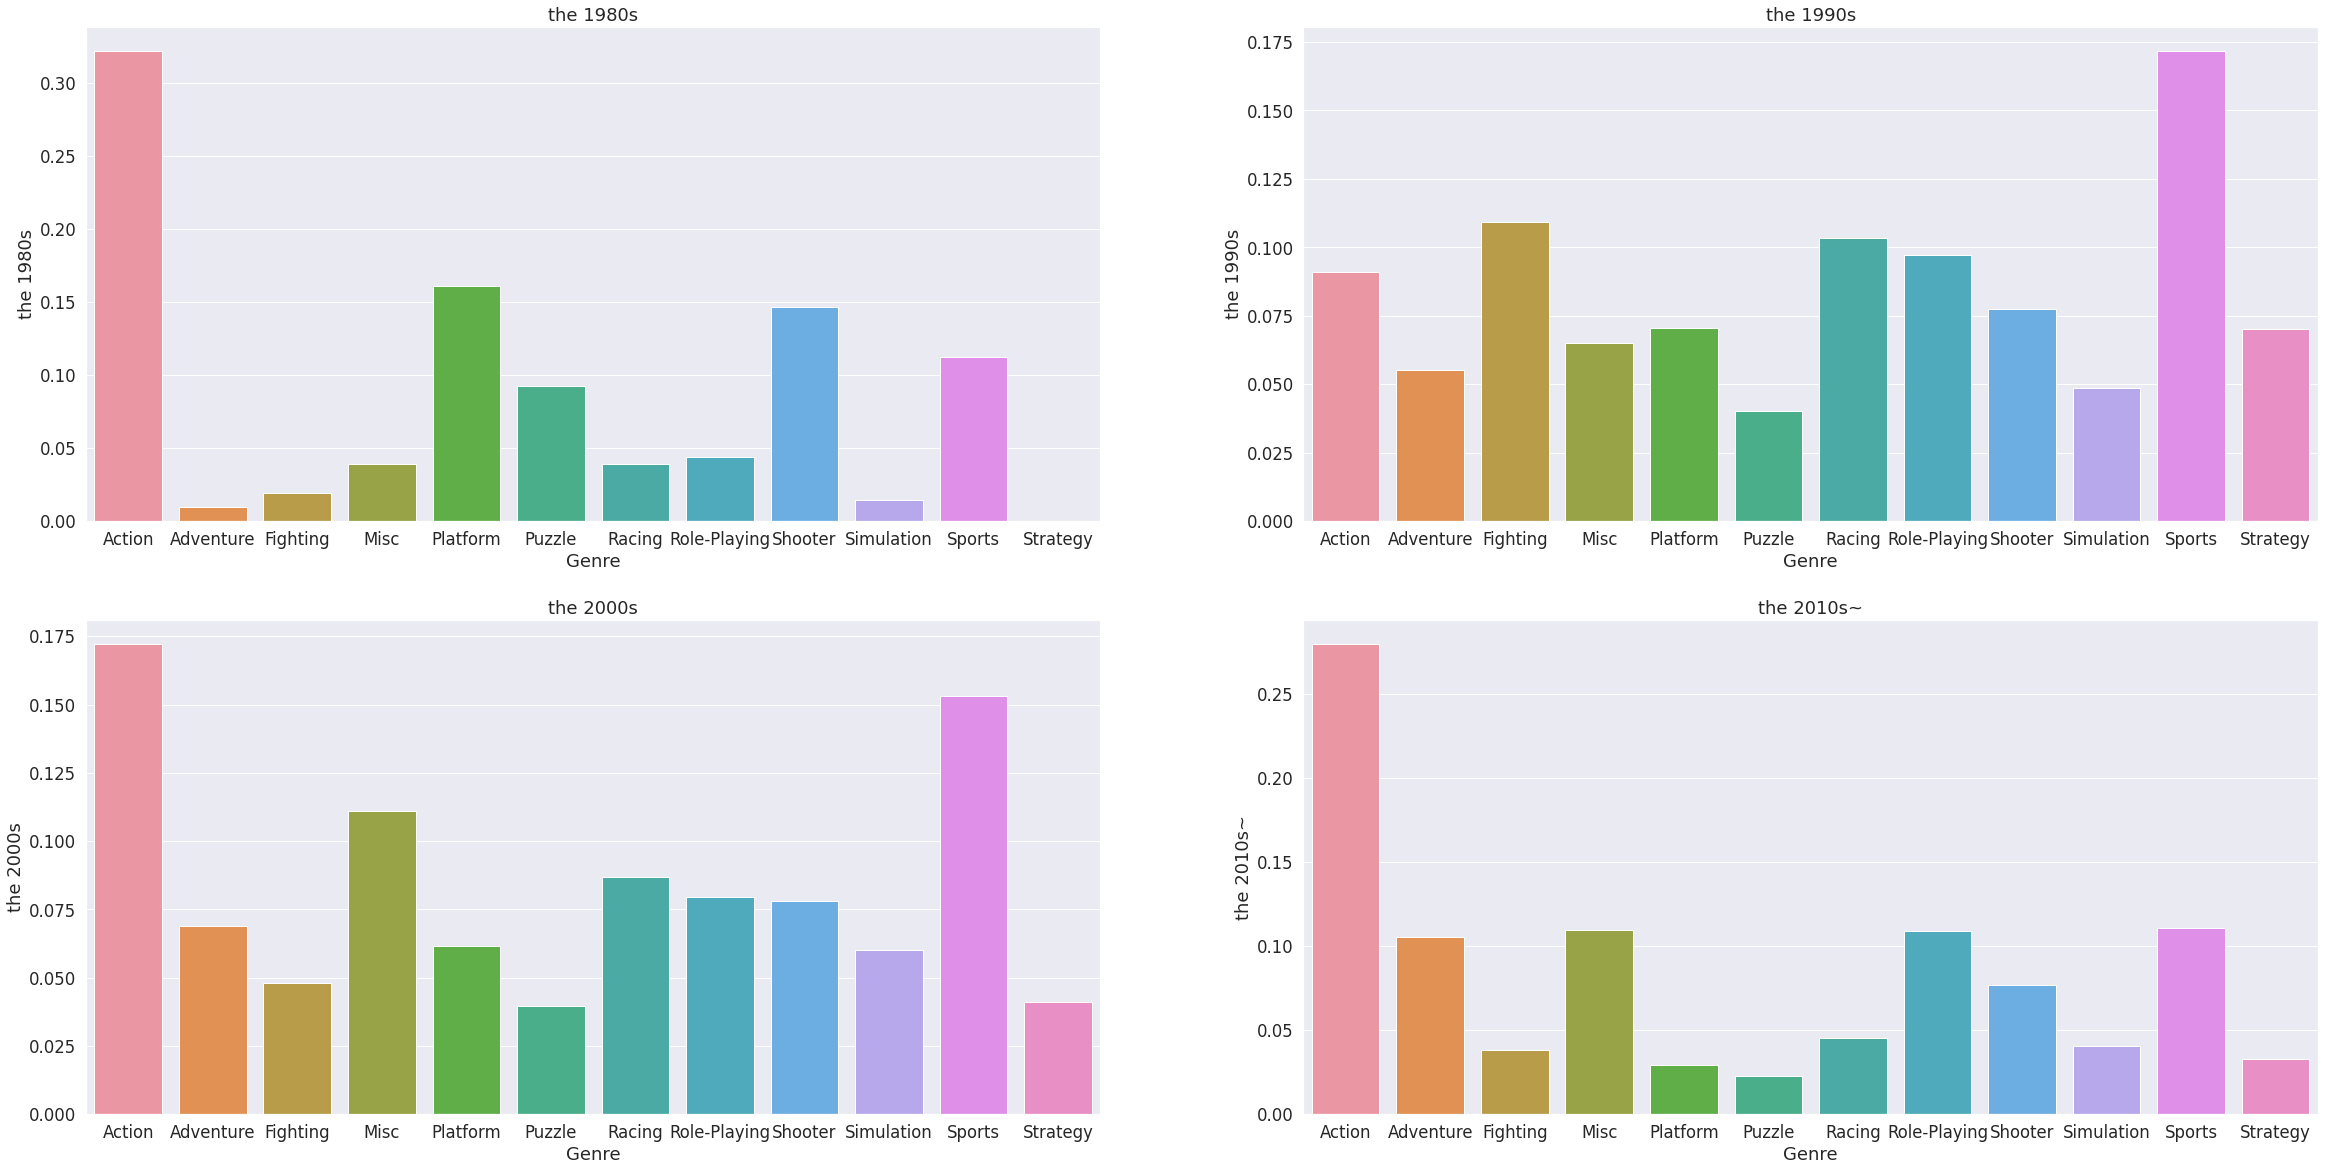

In [84]:
# 장르별 각 연도에 따른 출시량의 비율 그래프
fig = plt.figure(figsize=([40,20]))
y_data = cat_df.index
sns.set(font_scale=1.5)

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(x=cat_df.columns,y=cat_df.iloc[i,:])
plt.show()

In [85]:
year_gen_df = pd.concat([cat_year,df_sub.Genre,df_sub.Total_Sales],axis=1)

In [86]:
year_gen_df = year_gen_df.groupby(['Year','Genre']).Total_Sales.sum().unstack().fillna(0)

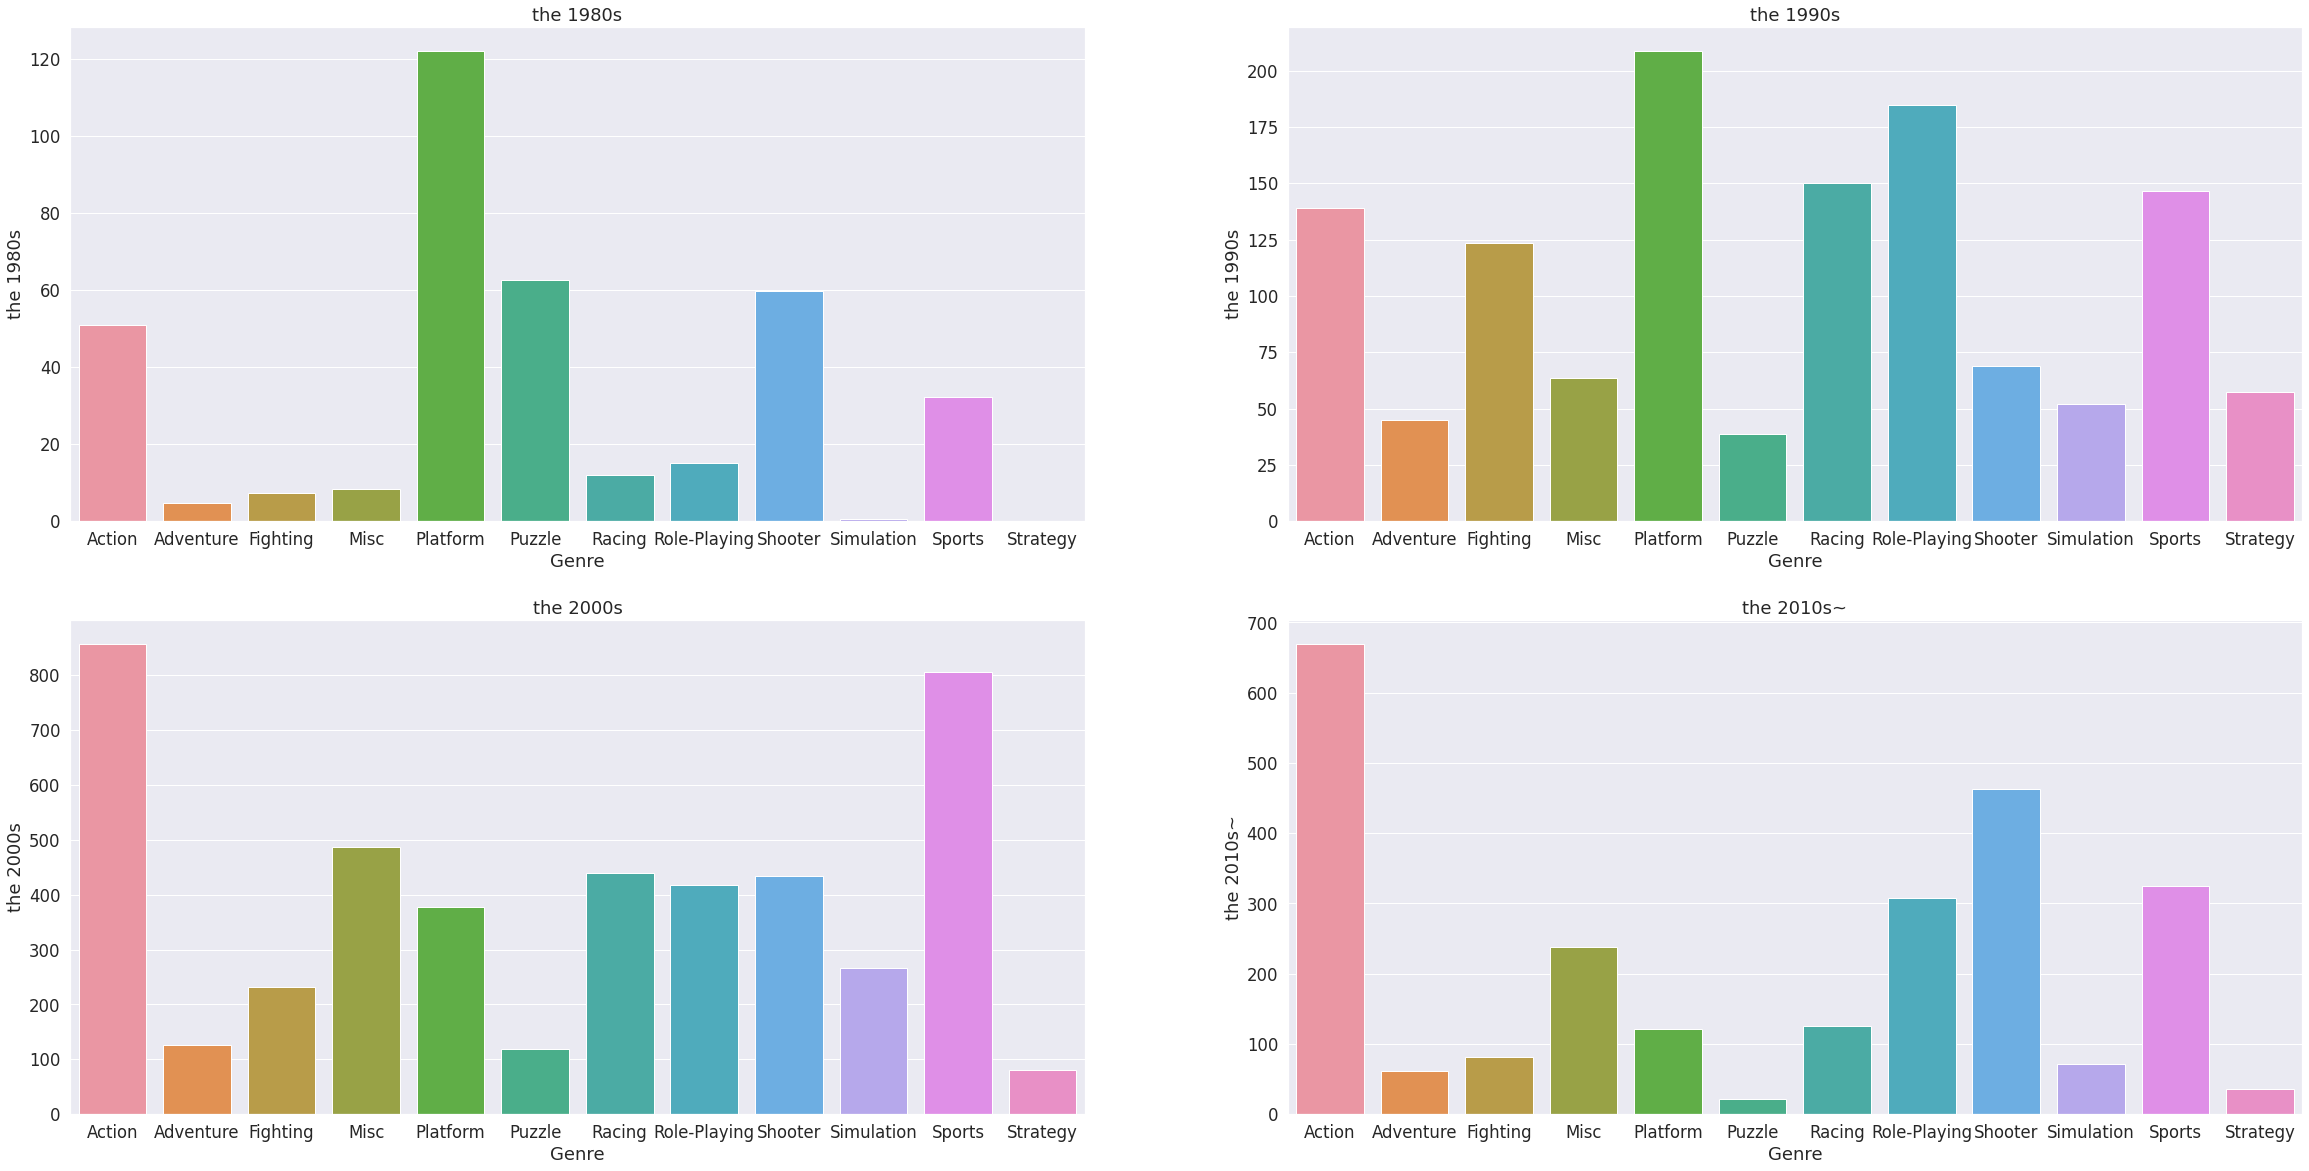

In [87]:
# 연도에 따른 각 장르의 판매량 그래프
fig = plt.figure(figsize=([40,20]))
y_data = year_gen_df.index

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(x=year_gen_df.columns,y=year_gen_df.iloc[i,:])
plt.show()

1990년대에는 스포츠 게임이 많이 출시되었지만, 판매량의 관점에서는 액션게임과는 큰 차이가 없음.<br>
오히려 출시량 대비 판매량은 Action이 높다.<br>
액션장르의 게임은 시대를 막론하고 많은 양이 출시되었다.<br>
90년대에는 스포츠 장르의 게임의 출시량 비율이 높게 나온다.<br>
2010년 이후에는 액션게임이 압도적이다. 아마 다양한 종류의 게임이 액션게임의 범주 하에 존재하다보니 높은 비율로 나타난다고 판단된다.

슈퍼마리오 짱짱맨

In [88]:
count_df = pd.concat([cat_year,df_sub.Genre],axis=1)
count_df = count_df.groupby('Year').Genre.value_counts().unstack().fillna(0)

In [89]:
ratio_gensales_df = (year_gen_df/count_df).fillna(0)

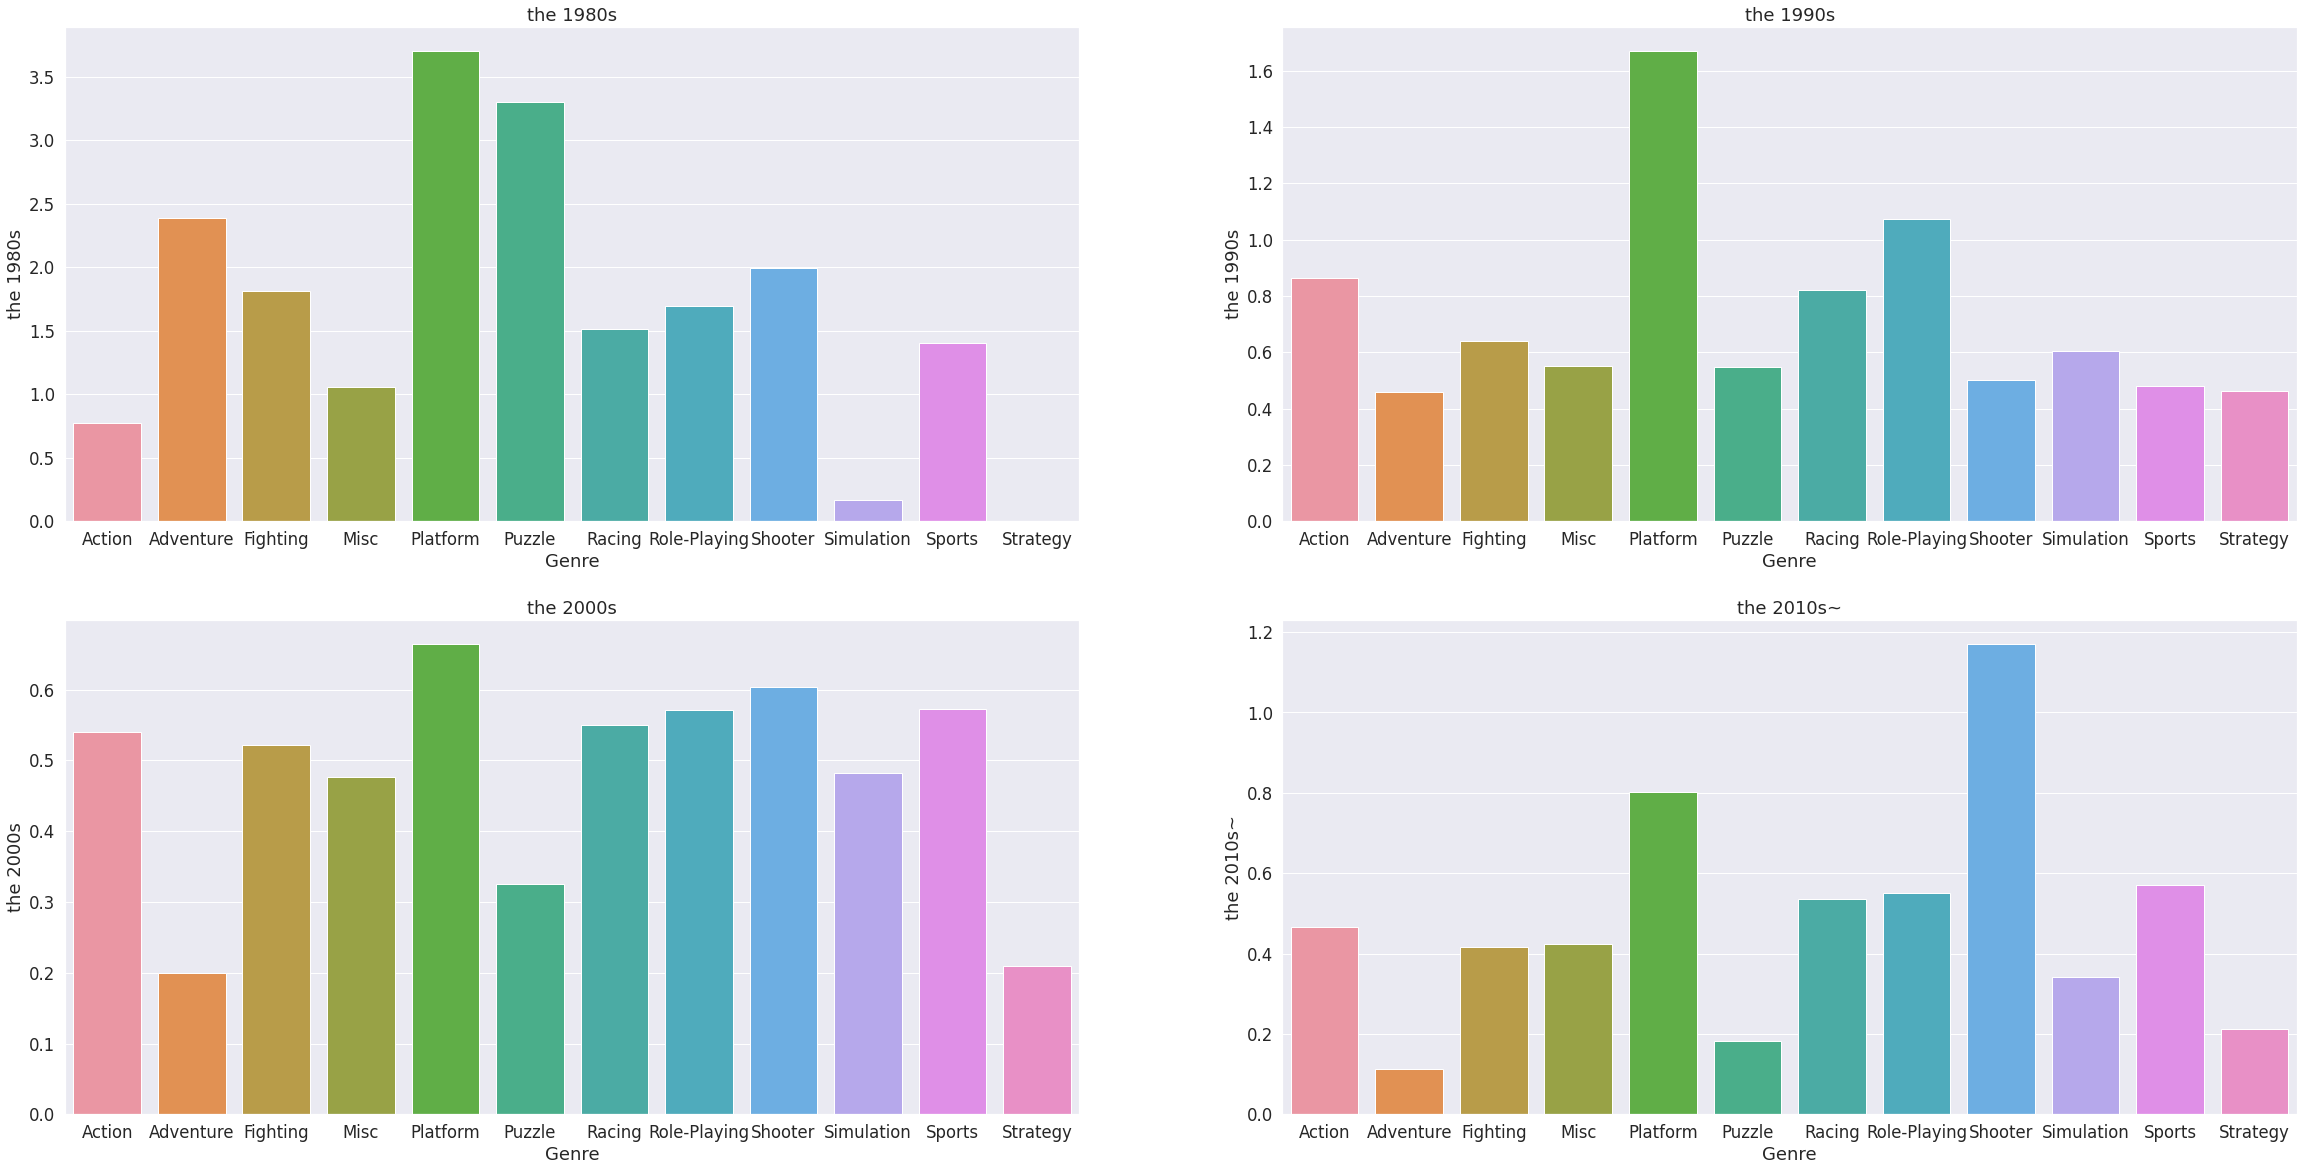

In [90]:
# 연도에 따른 각 장르의 출시량 대비 판매량
fig = plt.figure(figsize=([40,20]))
y_data = count_df.index

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(x=ratio_gensales_df.columns,y=ratio_gensales_df.iloc[i,:])
plt.show()

In [91]:
# line 그래프로 시각화
cat=cat_df.loc[:,('Action','Platform','Role-Playing','Shooter','Sports')]
year_gen=year_gen_df.loc[:,('Action','Platform','Role-Playing','Shooter','Sports')]
ratio=ratio_gensales_df.loc[:,('Action','Platform','Role-Playing','Shooter','Sports')]

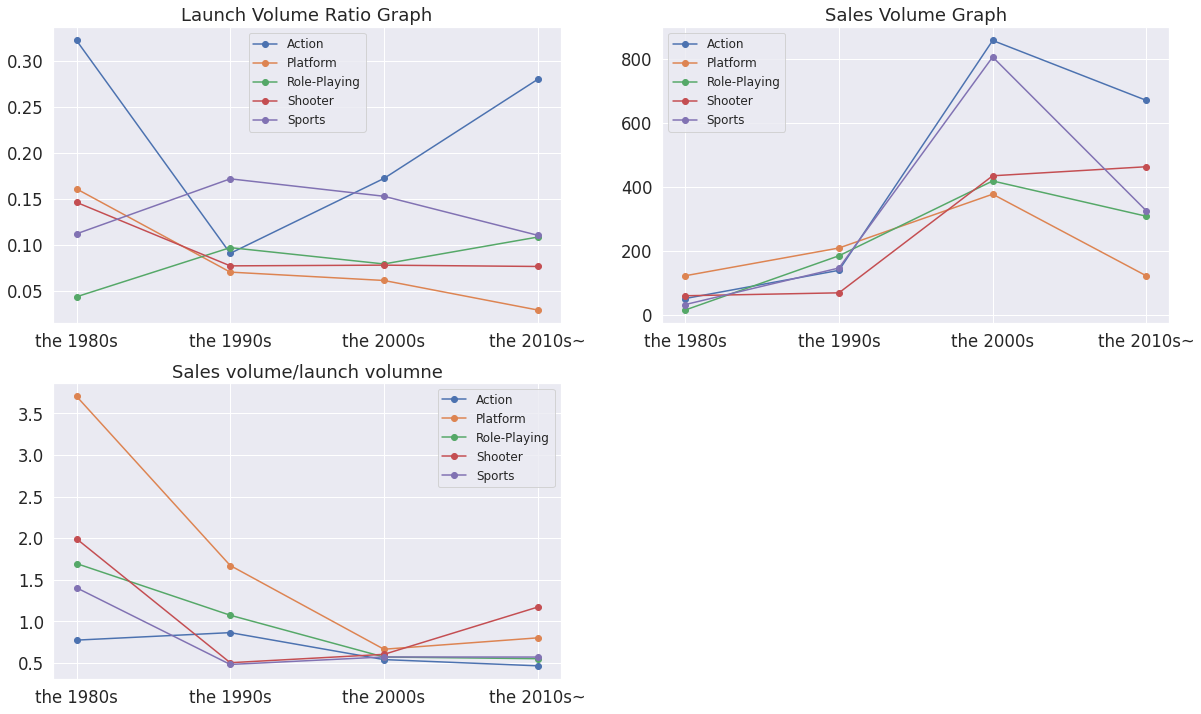

In [92]:
plt.figure(figsize=([20,12]))

plt.subplot(2,2,1)
plt.plot(cat.index,cat,marker='o')
plt.legend(cat.columns,fontsize=12,loc='best')
plt.title('Launch Volume Ratio Graph')

plt.subplot(2,2,2)
plt.plot(year_gen.index,year_gen,marker='o')
plt.legend(year_gen.columns,fontsize=12,loc='best')
plt.title('Sales Volume Graph')

plt.subplot(2,2,3)
plt.plot(ratio.index,ratio,marker='o')
plt.legend(ratio.columns,fontsize=12,loc='best')
plt.title('Sales volume/launch volumne')


plt.show()

모바일 플랫폼 출시작에 대한 정보가 없어서 감소하는 것처럼 보이는 것으로 사료됨.

---

> 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [93]:
# 출고량 상위 10%
best=df_sub.groupby(['Name','Platform','Genre'],as_index=False).Total_Sales.sum().sort_values(by='Total_Sales',ascending=False).head(1632)
best

,Name,Platform,Genre,Total_Sales
15673,Wii Sports,Wii,Sports,82.74
13156,Super Mario Bros.,NES,Platform,40.24
7805,Mario Kart Wii,Wii,Racing,35.83
15675,Wii Sports Resort,Wii,Sports,33.00
10339,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.38
...,...,...,...,...
5109,Golden Sun: The Lost Age,GBA,Role-Playing,1.22
13263,Super Street Fighter IV: 3D Edition,3DS,Fighting,1.22
9357,Naruto Shippuden: Ultimate Ninja Storm 2,PS3,Fighting,1.22
13647,Test Drive 4,PS,Racing,1.21


In [94]:
best_gen_sale=best.groupby('Genre').Total_Sales.sum()
best_gen_count=best.Genre.value_counts()

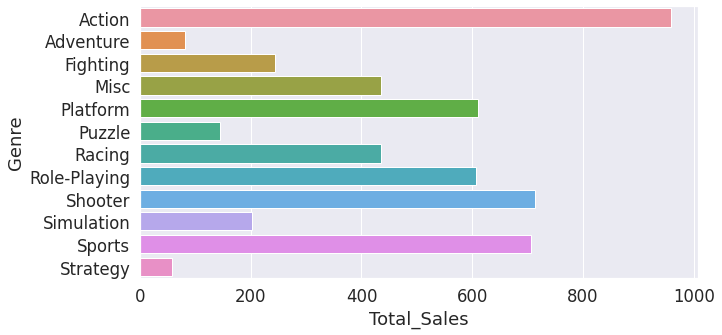

In [95]:
plt.figure(figsize=([10,5]))
sns.barplot(x=best_gen_sale,y=best_gen_sale.index)
plt.show()

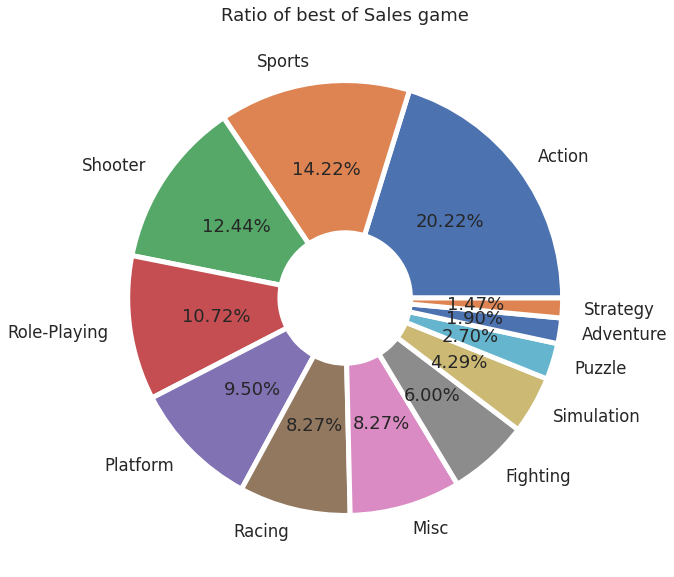

In [96]:
style={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=([10,10]))
plt.title('Ratio of best of Sales game')
plt.pie(best_gen_count,labels=best_gen_count.index,autopct='%.2f%%',wedgeprops=style)
plt.show()

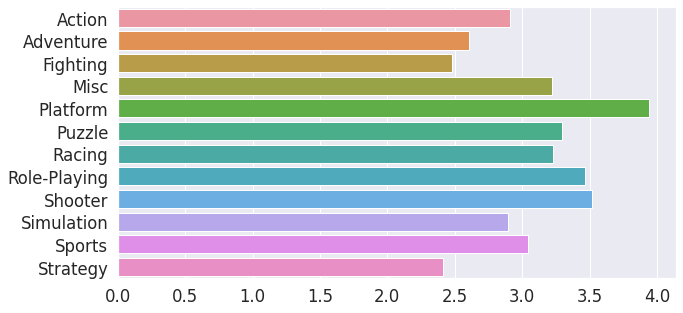

In [97]:
Sale_per=best.groupby('Genre').Total_Sales.sum()/best.Genre.value_counts()
plt.figure(figsize=([10,5]))
sns.barplot(x=Sale_per,y=Sale_per.index)
plt.show()

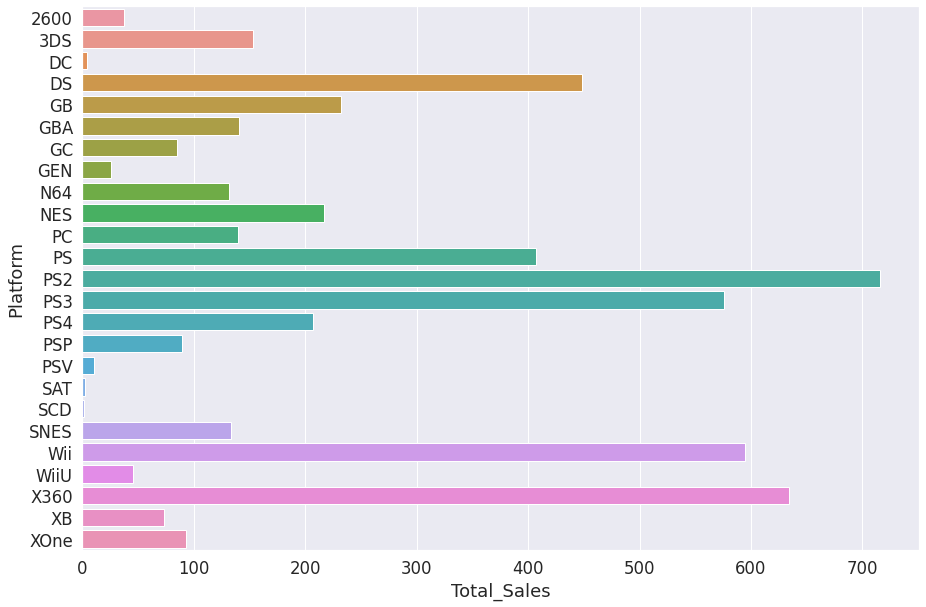

In [98]:
platform_sale = best.groupby('Platform').Total_Sales.sum()
plt.figure(figsize=([15,10]))
sns.barplot(x=platform_sale,y=platform_sale.index)
plt.show()

### 2-2. 나의 질문
> 어떤 나라의 구매력이 가장 강한가?

In [99]:
country_sales = df_sub.iloc[:,5:-1].sum()

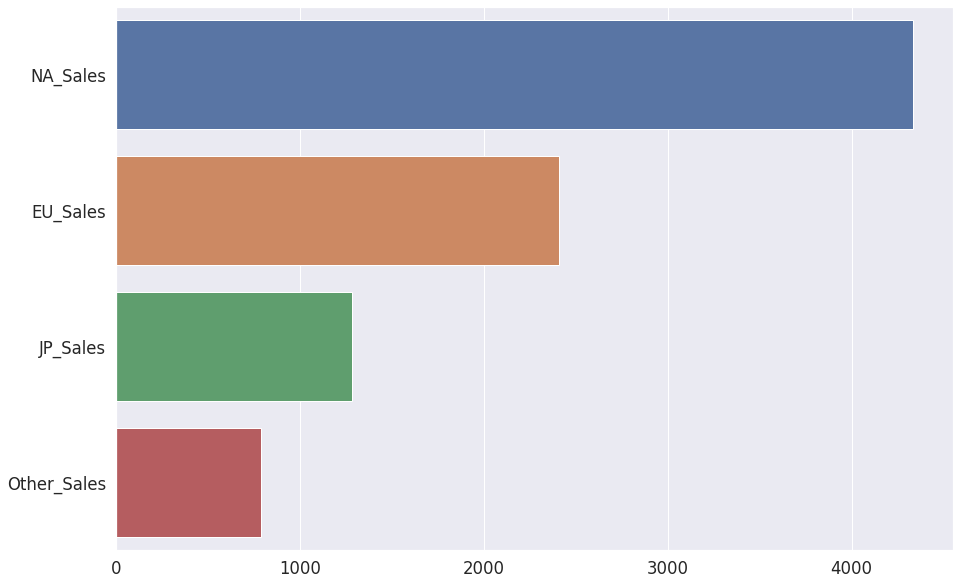

In [100]:
fig = plt.figure(figsize=([15,10]))
sns.barplot(x=country_sales,y=country_sales.index,orient='h')
plt.show()

미국이 가장 큰 구매력을 가지고 있다.<br>
따라서 주 target을 미국으로 한다.



---
> 어떤 장르가 좋은가?<br>

진짜 어떤게 좋을까. 일단 주 타겟은 미국으로 설정했다.<br>
출고량을 기준으로 살펴보아야한다.<br>
전체 출고량은 위에서 한 번 다루었다. 따라서 여기서는 미국에 대해서 자세히 살펴보자.

In [101]:
NA_Gen_count=df_sub.Genre.value_counts()

In [102]:
NA_Gen_sale=df_sub.groupby('Genre').NA_Sales.sum()

In [103]:
NA_Platform_count = df_sub[df_sub.Year>=2010].Platform.value_counts()

In [104]:
NA_Platform_sale=df_sub[df_sub.Year>=2010].groupby('Platform').NA_Sales.sum()

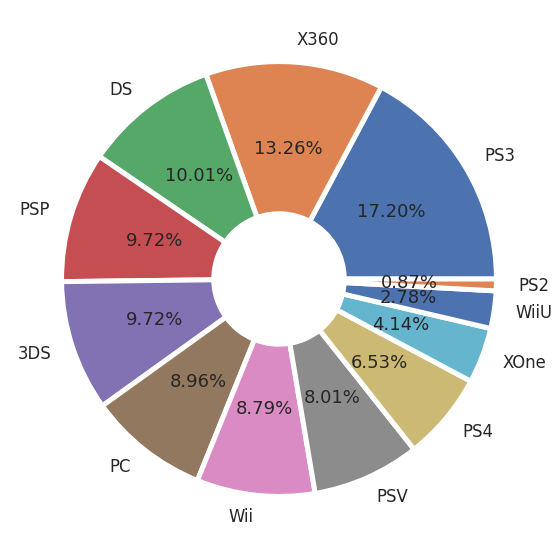

In [105]:
style={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=([10,10]))
plt.pie(NA_Platform_count,labels=NA_Platform_count.index,autopct='%.2f%%',wedgeprops=style)
plt.show()

In [123]:
New_pie_df = pd.DataFrame([42.34, 17.4, 8.96,31.3],index =['Play Station','X Box','PC','Nintendo'])
New_pie_df[0]

Play Station    42.34
X Box           17.40
PC               8.96
Nintendo        31.30
Name: 0, dtype: float64

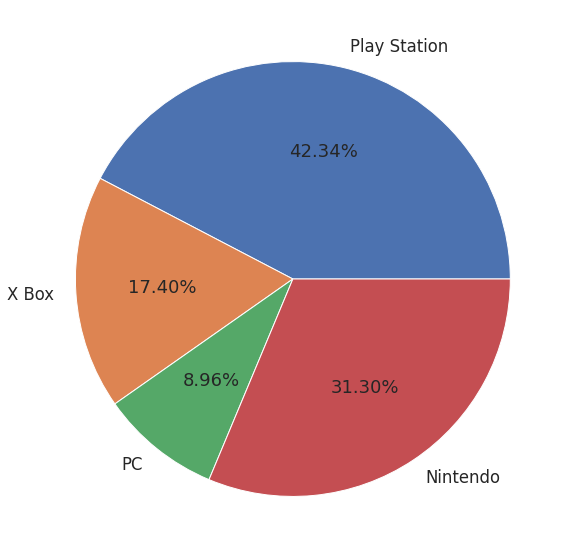

In [124]:
plt.figure(figsize=([10,10]))
plt.pie(New_pie_df[0],labels=New_pie_df.index,autopct='%.2f%%')
plt.show()

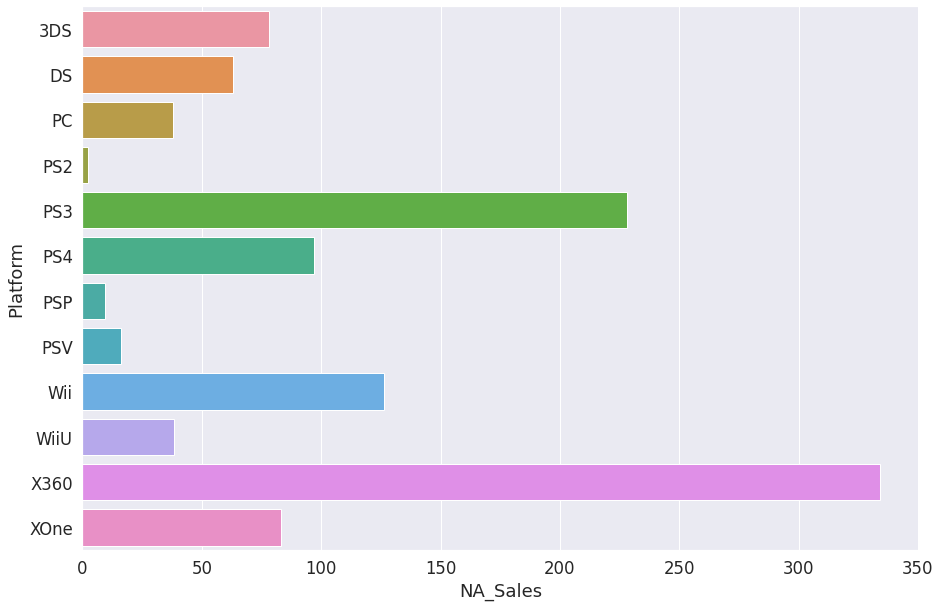

In [106]:
plt.figure(figsize=([15,10]))
sns.barplot(x=NA_Platform_sale,y=NA_Platform_sale.index)
plt.show()

In [107]:
NA_Platform_sale

Platform
3DS      78.03
DS       62.87
PC       38.05
PS2       2.32
PS3     228.11
PS4      96.80
PSP       9.58
PSV      16.07
Wii     126.51
WiiU     38.32
X360    333.92
XOne     83.19
Name: NA_Sales, dtype: float64

In [108]:
Ps=352.88
Xbox=416.46

실제로 2010년 이후에는 Sony사의 Xbox의 판매량이 더 많다.

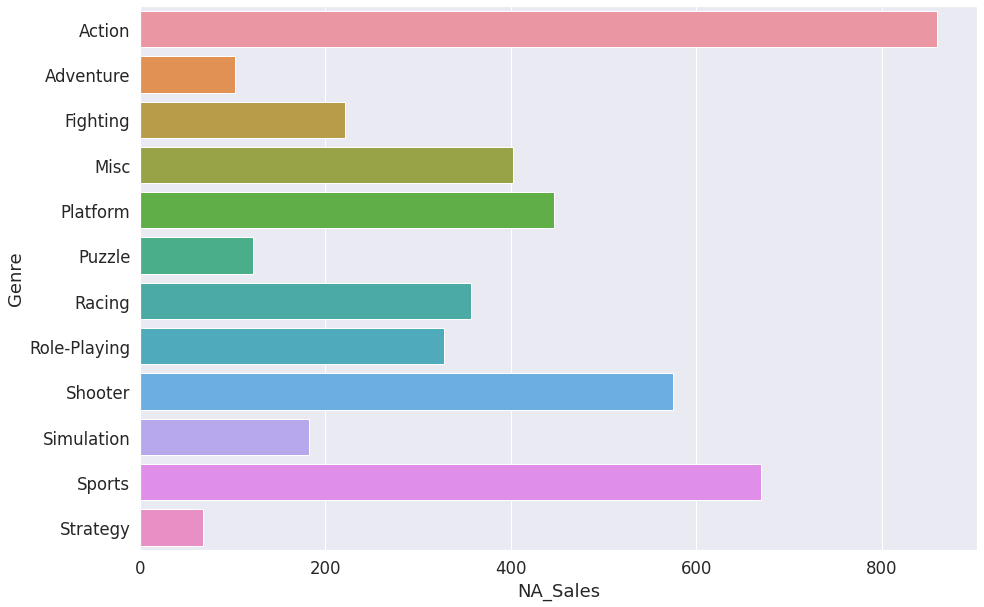

In [109]:
plt.figure(figsize=([15,10]))
sns.barplot(x=NA_Gen_sale,y=NA_Gen_sale.index)
plt.show()

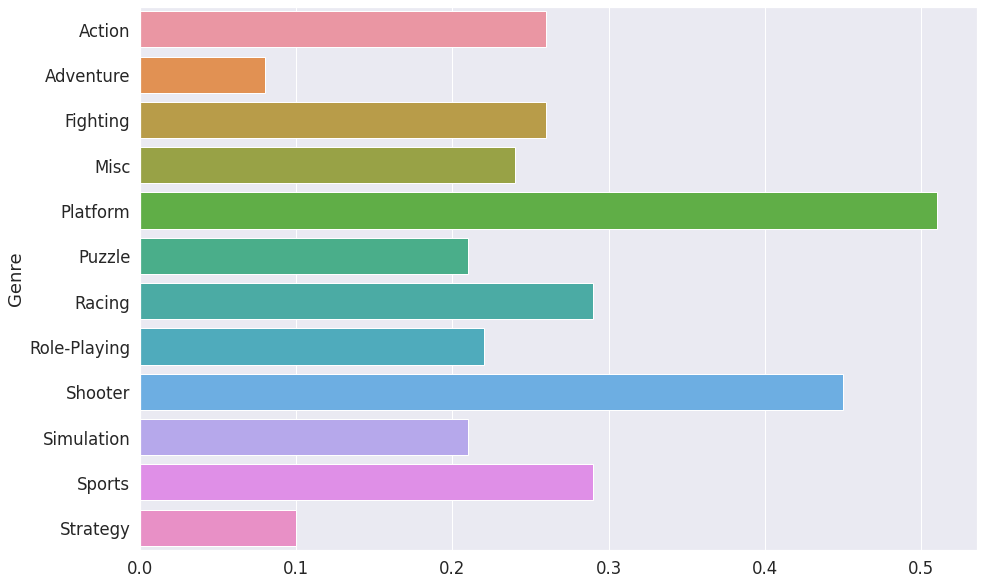

In [131]:
plt.figure(figsize=([15,10]))
sns.barplot(x=round(NA_Gen_sale/NA_Gen_count,2),y=NA_Gen_sale.index)
plt.show()

> 닌텐도가 없어도 `Platform`은 잘 팔리는가?


In [139]:
platform_game = df_sub[df_sub.Genre=='Platform']

In [153]:
total = platform_game.NA_Sales.sum()
nintendo_sell = platform_game[platform_game.Publisher=='Nintendo'].NA_Sales.sum()
other_pub = total-nintendo_sell

nintendo_num = platform_game[platform_game.Publisher=='Nintendo'].shape[0]
other_num = platform_game.shape[0] - nintendo_num

cou_per_sell_oth = round(other_pub/other_num,2)
cou_per_sell_nin = round(nintendo_sell/nintendo_num,2)

print(cou_per_sell_oth, cou_per_sell_nin)

0.3 1.98


In [154]:
New_series = round(NA_Gen_sale/NA_Gen_count,2)

In [158]:
New_series.Platform = 0.3

In [159]:
New_series.Platform

0.3

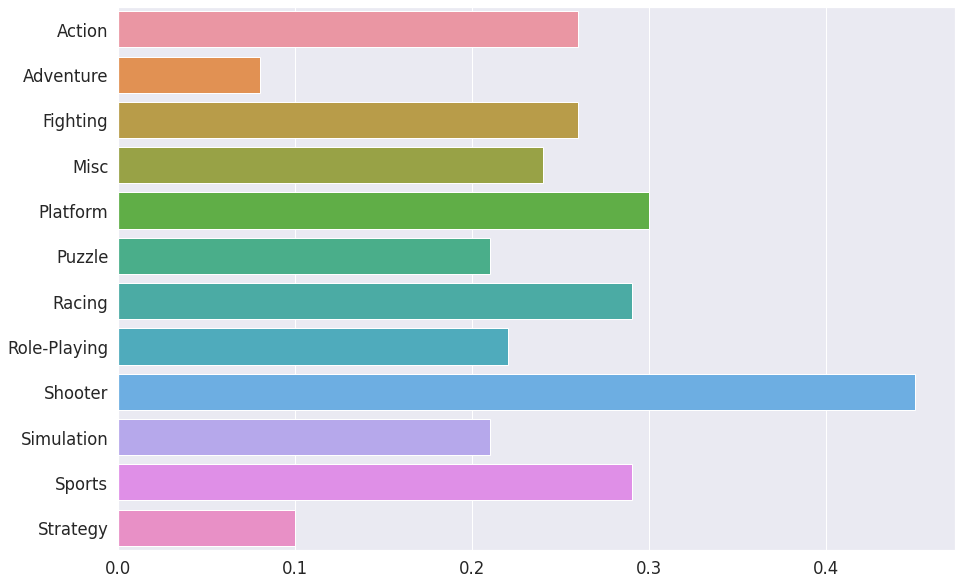

In [163]:
fig = plt.figure(figsize=([15,10]))
y_data = cat_df.index
sns.set(font_scale=1.5)

sns.barplot(x=New_series,y=New_series.index)
plt.show()